# Subjective evaluation of active noise cancellation in headphones

In [84]:
import numpy as np

## Dummy Data Generation

In [85]:
import random as rnd

samples_quantity = 30
measurements_per_sample = 8

### $X_1 \equiv$ ANC Status

In [86]:
anc_status = np.empty((samples_quantity, measurements_per_sample))

for i in range(samples_quantity):
    for j in range(0, measurements_per_sample, 4):
        anc_status[i][j] = 0 # Sin ANC
        anc_status[i][j+1] = 0 # Sin ANC
        anc_status[i][j+2] = 1 # Con ANC
        anc_status[i][j+3] = 1 # Con ANC

### $X_2 \equiv$ Measured Noise

In [87]:
import math

measured_noise_spl = np.empty((samples_quantity, measurements_per_sample))

noise_mean = 65
noise_deviation = 2
background_noise_spl = rnd.gauss(noise_mean, noise_deviation)
delta_spl = 15
generated_noise_spl = noise_mean + 3 * noise_deviation + delta_spl

for i in range(samples_quantity):
    for j in range(measurements_per_sample):
        background_noise_spl = rnd.gauss(noise_mean, noise_deviation)

        if (j % 2 == 0):
            measured_noise_spl[i][j] = background_noise_spl # Solo ruido de fondo
        else:
            measured_noise_spl[i][j] = 10 * math.log10(10 ** (background_noise_spl / 10) + 10 ** (generated_noise_spl / 10)) # Ruido de fondo y señal de ruido de alguna situación

### $Y_1, Y_2 \equiv$ Perceived Noise Level and Sound Quality

In [88]:
perceived_noise = np.empty((samples_quantity, measurements_per_sample))
perceived_quality = np.empty((samples_quantity, measurements_per_sample))

for i in range(samples_quantity):
    for j in range(0, measurements_per_sample, 4):
        perceived_noise[i][j] = rnd.randint(1, 4) # Sin ANC, poco ruido
        perceived_noise[i][j+1] = rnd.randint(4, 5) # Sin ANC, mucho ruido
        perceived_noise[i][j+2] = rnd.randint(1, 2) # Con ANC, poco ruido
        perceived_noise[i][j+3] = rnd.randint(1, 3) # Con ANC, mucho ruido

        perceived_quality[i][j] = rnd.randint(3, 5) # Sin ANC, poco ruido
        perceived_quality[i][j+1] = rnd.randint(3, 5) # Sin ANC, mucho ruido
        perceived_quality[i][j+2] = rnd.randint(2, 5) # Con ANC, poco ruido
        perceived_quality[i][j+3] = rnd.randint(1, 4) # Con ANC, mucho ruido

## Results Dot Plots

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

x_1 = anc_status.ravel()
x_2 = measured_noise_spl.ravel()
y_1 = perceived_noise.ravel()
y_2 = perceived_quality.ravel()

### $X_2 \equiv$ Measured Noise Level Dot Plot

/Users/mrmalvicino/Desktop/GitHub/anc/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


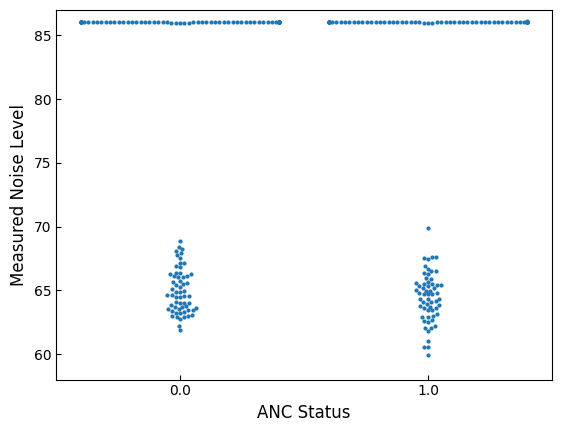

In [90]:
y_min = noise_mean - 3 * noise_deviation - 1
y_max = noise_mean + 3 * noise_deviation + delta_spl + 1

sns.swarmplot(x = x_1, y = x_2, size = 3)
plt.tick_params(axis = 'both', direction = 'in')
plt.ylim(y_min, y_max)
plt.xlabel('ANC Status', fontsize = 12)
plt.ylabel('Measured Noise Level', fontsize = 12)
plt.show()

### $Y_1 \equiv$ Perceived Noise Level Dot Plot

/Users/mrmalvicino/Desktop/GitHub/anc/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


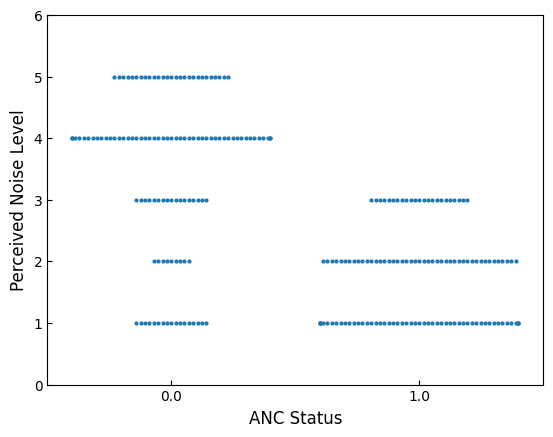

In [91]:
sns.swarmplot(x = x_1, y = y_1, size = 3)
plt.tick_params(axis = 'both', direction = 'in')
plt.ylim(0, 6)
plt.xlabel('ANC Status', fontsize = 12)
plt.ylabel('Perceived Noise Level', fontsize = 12)
plt.show()

### $Y_2 \equiv$ Perceived Sound Quality Dot Plot

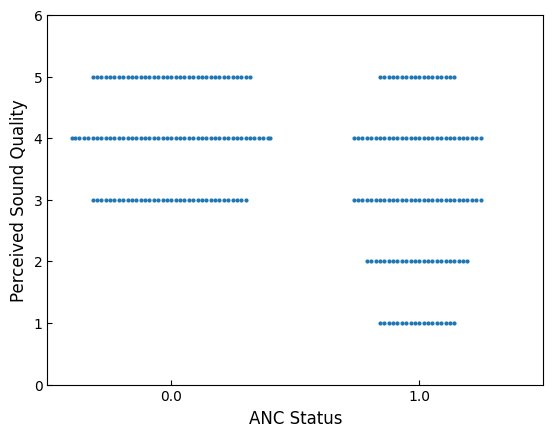

In [92]:
sns.swarmplot(x = x_1, y = y_2, size = 3)
plt.tick_params(axis = 'both', direction = 'in')
plt.ylim(0, 6)
plt.xlabel('ANC Status', fontsize = 12)
plt.ylabel('Perceived Sound Quality', fontsize = 12)
plt.show()

## Data Validation

### Box Plot

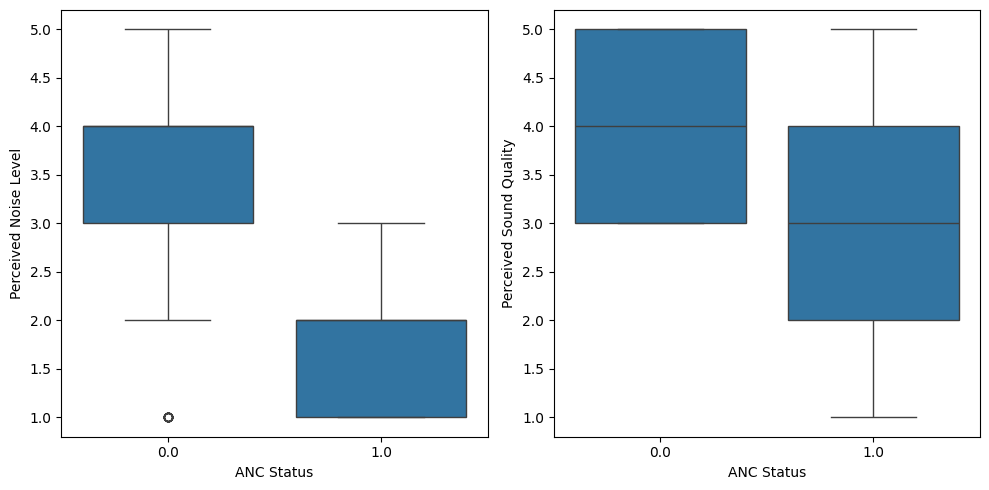

In [93]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = x_1, y = y_1)
plt.xlabel('ANC Status')
plt.ylabel('Perceived Noise Level')

plt.subplot(1, 2, 2)
sns.boxplot(x = x_1, y = y_2)
plt.xlabel('ANC Status')
plt.ylabel('Perceived Sound Quality')

plt.tight_layout()
plt.show()

### Histogram

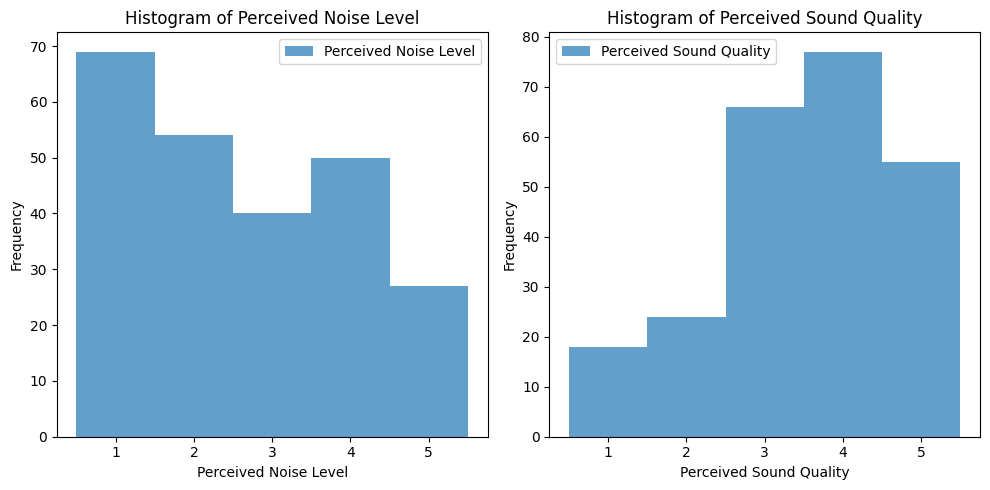

In [94]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y_1, bins=np.arange(0.5, 6.5), alpha=0.7, label='Perceived Noise Level')
plt.xlabel('Perceived Noise Level')
plt.ylabel('Frequency')
plt.title('Histogram of Perceived Noise Level')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_2, bins=np.arange(0.5, 6.5), alpha=0.7, label='Perceived Sound Quality')
plt.xlabel('Perceived Sound Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Perceived Sound Quality')
plt.legend()

plt.tight_layout()
plt.show()

### Shapiro-Wilk Normality test

In [95]:
from scipy import stats

statistic, p_value = stats.shapiro(x_2)

print("X2:")
print(f"Statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

statistic, p_value = stats.shapiro(y_1)

print("\nY1:")
print(f"Statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

statistic, p_value = stats.shapiro(y_2)

print("\nY2:")
print(f"Statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

X2:
Statistic: 0.708
p-value: 0.000

Y1:
Statistic: 0.874
p-value: 0.000

Y2:
Statistic: 0.888
p-value: 0.000


## Correlation and Regression

In [96]:
import statsmodels.api as sm

### Scatter Plot and Pearson Correlation for $Y_1(X_1)$

In [97]:
# plt.scatter(x_1, y_1)
# plt.tick_params(axis = 'both', direction = 'in')
# plt.xlim(-1, 2)
# plt.ylim(0, 6)
# plt.xlabel('Variable X1 [ANC Status]', fontsize = 12)
# plt.ylabel('Variable Y1 [Noise score]', fontsize = 12)
# plt.show()

correlation_coefficient, p_value = stats.pearsonr(x_1, y_1)

print(f"r = {correlation_coefficient:.3f}")
print(f"p-value = {p_value:.3f}")

r = -0.635
p-value = 0.000


### Scatter Plot and Pearson Correlation for $Y_2(X_1)$

In [98]:
# plt.scatter(x_1, y_2)
# plt.tick_params(axis = 'both', direction = 'in')
# plt.xlim(-1, 2)
# plt.ylim(0, 6)
# plt.xlabel('Variable X1 [ANC Status]', fontsize = 12)
# plt.ylabel('Variable Y2 [Quality score]', fontsize = 12)
# plt.show()

correlation_coefficient, p_value = stats.pearsonr(x_1, y_2)

print(f"r = {correlation_coefficient:.3f}")
print(f"p-value = {p_value:.3f}")

r = -0.411
p-value = 0.000


### Linear Regression for $Y_1(X_1)$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.71e-28
Time:                        17:37:31   Log-Likelihood:                -355.56
No. Observations:                 240   AIC:                             715.1
Df Residuals:                     238   BIC:                             722.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5083      0.098     35.951      0.0

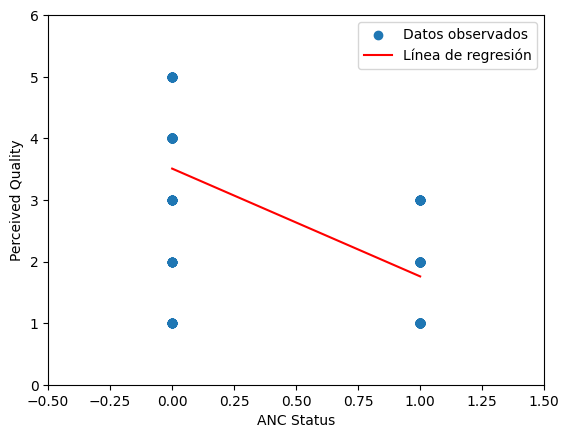

In [99]:
x_1_c = sm.add_constant(x_1)
model = sm.OLS(y_1, x_1_c).fit()
print(model.summary())
predictions = model.predict(x_1_c)

plt.scatter(x_1, y_1, label='Datos observados')
plt.plot(x_1, predictions, color='red', label='Línea de regresión')
plt.xlim(-0.5, 1.5)
plt.ylim(0, 6)
plt.xlabel('ANC Status')
plt.ylabel('Perceived Quality')
plt.legend()
plt.show()

### Linear Regression for $Y_2(X_1)$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     48.45
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           3.27e-11
Time:                        17:37:34   Log-Likelihood:                -354.99
No. Observations:                 240   AIC:                             714.0
Df Residuals:                     238   BIC:                             720.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0083      0.097     41.172      0.0

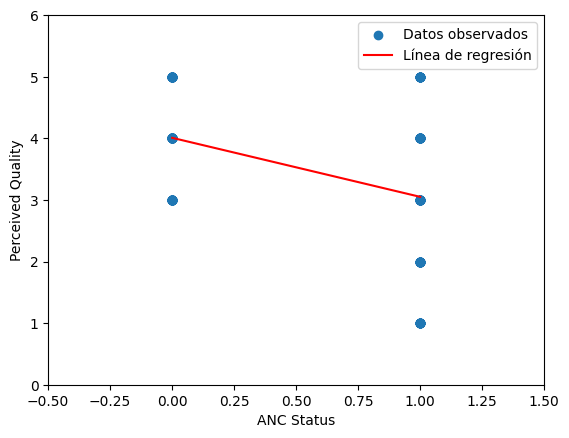

In [100]:
x_1_c = sm.add_constant(x_1)
model = sm.OLS(y_2, x_1_c).fit()
print(model.summary())
predictions = model.predict(x_1_c)

plt.scatter(x_1, y_2, label='Datos observados')
plt.plot(x_1, predictions, color='red', label='Línea de regresión')
plt.xlim(-0.5, 1.5)
plt.ylim(0, 6)
plt.xlabel('ANC Status')
plt.ylabel('Perceived Quality')
plt.legend()
plt.show()